## Import libraries

In [100]:
import csv
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


## Enter GAP in lists

In [91]:
NAU,IMA,MADA,MOU,ALL = [],[],[],[],[]
with open('tweets_noon_ALL_gap.csv','r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        ALL.append(float(row[1]))

with open('tweets_noon_NAU_gap.csv','r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        NAU.append(float(row[1]))

with open('tweets_noon_IMA_gap.csv','r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        IMA.append(float(row[1]))

with open('tweets_noon_MADA_gap.csv','r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        MADA.append(float(row[1]))

with open('tweets_noon_MOU_gap.csv','r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        MOU.append(float(row[1]))


In [101]:
print(np.mean(NAU))
print(np.mean(IMA))
print(np.mean(MADA))
print(np.mean(MOU))
print(np.mean(ALL))

92.48648648648648
1737.1538461538462
612.6
6.293103448275862
2571.7186540072607


## Box plot

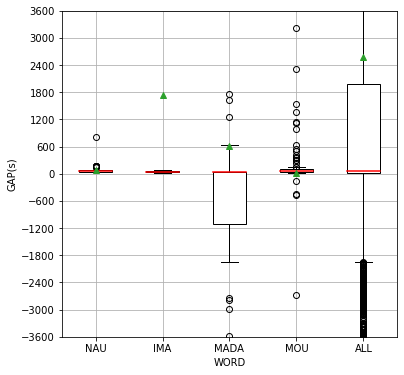

In [97]:
data = [NAU,IMA,MADA,MOU,ALL]

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.boxplot(data,
           whis=1,
           patch_artist=True,  
           widths=0.5,  
           boxprops=dict(facecolor='#ffffffff',color='black', linewidth=1),
           medianprops=dict(color='red', linewidth=1.5),
           whiskerprops=dict(color='black', linewidth=1),
           capprops=dict(color='black', linewidth=1),
           flierprops=dict(markeredgecolor='black', markeredgewidth=1),
           showmeans=True
           )
ax.set_xticklabels(['NAU','IMA','MADA','MOU','ALL'])

plt.xlabel('WORD')
plt.ylabel('GAP(s)')
plt.ylim([-3600,3600])
plt.yticks([-3600,-3000,-2400,-1800,-1200,-600,0,600,1200,1800,2400,3000,3600])
plt.grid()

plt.show()

## show bootstrap confidence intervals

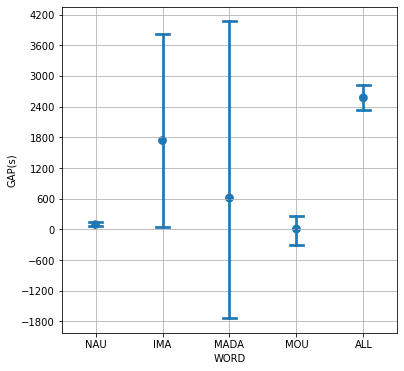

In [98]:
plt.figure(figsize=(6,6))

ax = sns.pointplot(data=data,join=False,capsize=0.2,ci=95)
ax.set_xticklabels(['NAU','IMA','MADA','MOU','ALL'])

plt.xlabel('WORD')
plt.ylabel('GAP(s)')

plt.yticks([-1800,-1200,-600,0,600,1200,1800,2400,3000,3600,4200])
plt.grid()

## calculate 95 percent confidence interval 

In [111]:
from scipy import stats
def get_confidence_interval(X):
    a = 0.95 #alpha
    d = len(X)-1 #degree of freedom
    m = np.mean(X) #sample mean
    s = stats.sem(X) #unbiased standard error
    print(m, stats.t.interval(alpha=a, df=d, loc=m, scale=s))

In [112]:
for word in data:  # data=[NAU,IMA,MADA,MOU,ALL]
    get_confidence_interval(word)  # output "mean,(confidence_interval)"

92.48648648648648 (49.01999037731411, 135.95298259565885)
1737.1538461538462 (-806.5051714945171, 4280.81286380221)
612.6 (-2743.857803170274, 3969.057803170274)
6.293103448275862 (-279.97869229594716, 292.5648991924989)
2571.7186540072607 (2313.730618057701, 2829.7066899568204)
